In [1]:
#CON UNA SOLA b!!!!

import math
import itertools
import random 
import time
import numpy as np

time_start = time.clock()
L=10
N=L**2
M=1000
mc=3
b=-2.5
s=np.random.normal(0,1, size=(L,L))
s2=np.zeros((L,L))

def neighbors(s, L, x, y):
    left   = (x, y - 1)
    right  = (x, (y + 1) % L)
    top    = (x - 1, y)
    bottom = ((x + 1) % L, y)

    return [s[left[0], left[1]],
            s[right[0], right[1]],
            s[top[0], top[1]],
            s[bottom[0], bottom[1]]]


def h(x):
    return np.exp(-1/4*x**4)

    
for i in range(1000):
    g=np.random.normal(0,np.sqrt(-1/b))
    if np.random.uniform()<h(g):
        i=np.random.randint(0, L)
        j=np.random.randint(0, L)
        s2[i][j]=g
        deltaH=(s[i][j]-s2[i][j])*np.sum(neighbors(s,L,i,j))
        if deltaH<=0:
            s[i][j]=s2[i][j]
        if deltaH>0 and np.random.uniform()< np.exp(-deltaH):
            s[i][j]=s2[i][j] 
    
   


rm1=np.float(abs(sum(s[i][j] for i in range(L) for j in range(L))))/N
c=0
rm2=0
rm=0

for i in range(M):
    for k in range(mc):
        g=np.random.normal(0,np.sqrt(-1/b))
        if np.random.uniform()<h(g):
            i=np.random.randint(0, L)
            j=np.random.randint(0, L)
            s2[i][j]=g
            deltaH=(s[i][j]-s2[i][j])*np.sum(neighbors(s,L,i,j))
            if deltaH<=0:
                s[i][j]=s2[i][j]
            if deltaH>0 and np.random.uniform()< np.exp(-deltaH):
                s[i][j]=s2[i][j]  
        
        
    rm0=np.float(abs(sum(s[p][q] for p in range(L) for q in range(L))))/N
    rm=rm+rm0
    rm2=rm2+rm0**2
    c=c+rm0*rm1
    rm1=rm0


mag=np.float(rm)/M
rm2=np.float(rm2)/M-mag**2
c=np.float(float(c)/M-mag**2)/rm2
tau=np.float(c)/(1-c)
errorsintau=np.sqrt(float(rm2)/M)
error=np.sqrt(float(rm2)*(2*tau+1)/M)

print(mag,tau,errorsintau,error)


time_elapsed = (time.clock() - time_start)
print(time_elapsed)  


(0.11480460905080102, 38592.116453373994, 0.0022052787226456067, 0.6126756169055432)
0.7627909


In [111]:
#Con solo una b, haz bien el while
import numpy as np
import math
import itertools
import random 
import time


time_start = time.clock()
L=10
N=L**2
M=1000
mc=100
b=-2
s=np.random.normal(0,1, size=(L,L))
s2=np.zeros((L,L))

def neighbors(s, L, x, y):
    left   = (x, y - 1)
    right  = (x, (y + 1) % L)
    top    = (x - 1, y)
    bottom = ((x + 1) % L, y)

    return [s[left[0], left[1]],
            s[right[0], right[1]],
            s[top[0], top[1]],
            s[bottom[0], bottom[1]]]


def h(x):
    return np.exp(-1/4*x**4)


naccept=0
en=0
therm=10000
while naccept<therm:
    g=np.random.normal(0,np.sqrt(-1/np.float(b)))
    if np.random.uniform()<h(g):
        naccept+=1
        i=np.random.randint(0, L)
        j=np.random.randint(0, L)
        s2[i][j]=g
        deltaH=(s[i][j]-s2[i][j])*np.sum(neighbors(s,L,i,j))
        en+=np.exp(-deltaH)
        if deltaH<=0:
            s[i][j]=s2[i][j]
        if deltaH>0 and np.random.uniform()< np.exp(-deltaH):
            s[i][j]=s2[i][j] 
    else:
        continue
   

print(np.float(en)/therm)

rm1=np.float(abs(sum(s[i][j] for i in range(L) for j in range(L))))/N
c=0
rm2=0
rm=0

for i in range(M):
    naccept2=0
    while naccept2<mc:
        g=np.random.normal(0,np.sqrt(-1/np.float(b)))
        if np.random.uniform()<h(g):
            naccept2+=1
            i=np.random.randint(0, L)
            j=np.random.randint(0, L)
            s2[i][j]=g
            deltaH=(s[i][j]-s2[i][j])*np.sum(neighbors(s,L,i,j))
            if deltaH<=0:
                s[i][j]=s2[i][j]
            if deltaH>0 and np.random.uniform()< np.exp(-deltaH):
                s[i][j]=s2[i][j]  
        else:
            continue
        
    rm0=np.float(abs(sum(s[p][q] for p in range(L) for q in range(L))))/N
    rm=rm+rm0
    rm2=rm2+rm0**2
    c=c+rm0*rm1
    rm1=rm0


mag=np.float(rm)/M
rm2=np.float(rm2)/M-mag**2
print(mag,rm2)
c=np.float(float(c)/M-mag**2)/rm2
tau=np.float(c)/(1-c)
errorsintau=np.sqrt(float(rm2)/M)
error=np.sqrt(float(rm2)*(2*tau+1)/M)

print(mag,tau,errorsintau,error)


time_elapsed = (time.clock() - time_start)
print(time_elapsed)  


0.995137049735
(0.09955558167447764, 0.005417596451999582)
(0.09955558167447764, 4.246754244687969, 0.0023275730819889593, 0.007171610551966064)
16.5484234


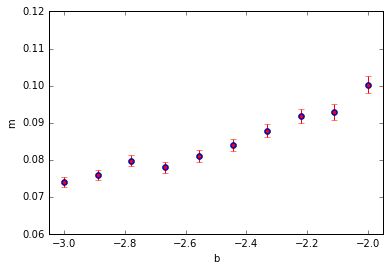

2293.7835082
(array([0.07391016, 0.07586714, 0.07973706, 0.07795816, 0.08091161,
       0.0839585 , 0.08787453, 0.09177579, 0.0929023 , 0.10024079]), array([5.62342821, 6.32414478, 6.46328752, 6.27295465, 6.77629998,
       7.10894421, 7.64191275, 8.38577163, 8.65215871, 9.37408442]))


In [120]:
#termalizado bien, todas las b
import numpy as np
import math
import itertools
import random
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt



time_start = time.clock()

L=10
N=L**2
M=10000
b=np.linspace(-3,-2,10)
mc=100

mag=np.zeros(np.size(b))
cc=np.zeros(np.size(b))
error=np.zeros(np.size(b))
errorsintau=np.zeros(np.size(b))
tau=np.zeros(np.size(b))
rm22=np.zeros(np.size(b))


def neighbors(s, L, x, y):
    left   = (x, y - 1)
    right  = (x, (y + 1) % L)
    top    = (x - 1, y)
    bottom = ((x + 1) % L, y)

    return [s[left[0], left[1]],
            s[right[0], right[1]],
            s[top[0], top[1]],
            s[bottom[0], bottom[1]]]


def h(x):
    return np.exp(-1/4*x**4)

    

        

for l in range(np.size(b)):
    s=np.random.normal(0,1, size=(L,L))
    s2=np.zeros((L,L))
    naccept=0
    while naccept<10000:
        g=np.random.normal(0,np.sqrt(-1/np.float(b[l])))
        if np.random.uniform()<h(g):
            naccept+=1
            i=np.random.randint(0, L)
            j=np.random.randint(0, L)
            s2[i][j]=g
            deltaH=(s[i][j]-s2[i][j])*np.sum(neighbors(s,L,i,j))
            if deltaH<=0:
                s[i][j]=s2[i][j]
            if deltaH>0 and np.random.uniform()< np.exp(-deltaH):
                s[i][j]=s2[i][j] 
        else:
            continue
    
    rm1=np.float(abs(sum(s[i][j] for i in range(L) for j in range(L))))/N
    c=0
    rm2=0
    rm=0
    for q in range(M):
        naccept2=0
        while naccept2<mc:
            g=np.random.normal(0,np.sqrt(-1/np.float(b[l])))
            if np.random.uniform()<h(g):
                naccept2+=1
                i=np.random.randint(0, L)
                j=np.random.randint(0, L)
                s2[i][j]=g
                deltaH=(s[i][j]-s2[i][j])*np.sum(neighbors(s,L,i,j))
                if deltaH<=0:
                    s[i][j]=s2[i][j]
                if deltaH>0 and np.random.uniform()< np.exp(-deltaH):
                    s[i][j]=s2[i][j]  
            else:
                continue
            
        rm0=np.float(abs(sum(s[p][q] for p in range(L) for q in range(L))))/N
        rm=rm+rm0
        rm2=rm2+rm0**2
        c=c+rm0*rm1
        rm1=rm0


    mag[l]=np.float(rm)/M
    rm22[l]=np.float(rm2)/M-mag[l]**2
    cc[l]=np.float(float(c)/M-mag[l]**2)/rm22[l]
    tau[l]=np.float(cc[l])/(1-cc[l])
    errorsintau[l]=np.sqrt(float(rm22[l])/M)
    error[l]=np.sqrt(float(rm22[l])*(2*tau[l]+1)/M)



plt.plot(b,mag, 'o')
plt.errorbar(b,mag, yerr=error, fmt='r.')
plt.xlabel('b')
plt.ylabel('m')
plt.axis([-3.05, -1.95, 0.06, mag[np.size(b)-1]+0.02])
plt.show()

time_elapsed = (time.clock() - time_start)
print(time_elapsed)  
print(mag, 2*tau+1)


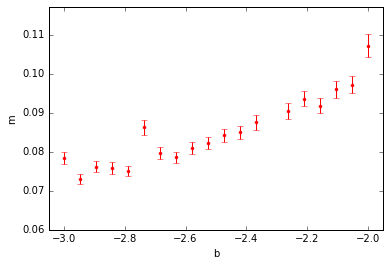

3103.8558369
(array([0.0784471 , 0.07290518, 0.07618181, 0.07580516, 0.07507391,
       0.08625493, 0.07974621, 0.07864952, 0.08093589, 0.08222381,
       0.08417031, 0.08501718, 0.08757281, 0.16133461, 0.09050395,
       0.0936269 , 0.09181764, 0.09595014, 0.09717676, 0.10718934]), array([ 6.95578112,  5.55009048,  6.3375242 ,  6.29704247,  5.95439957,
        8.04976076,  6.45876299,  5.94960369,  6.95955952,  6.6065162 ,
        7.33922962,  7.28759187,  8.1243743 , 23.49894336,  8.54090544,
        8.40751323,  8.47396357,  8.79697293,  9.37450948, 12.11422379]))


In [122]:
#termalizado bien, con muchas b 
import numpy as np
import math
import itertools
import random
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt



time_start = time.clock()

L=10
N=L**2
M=10000
b=np.linspace(-3,-2,20)
mc=100

mag=np.zeros(np.size(b))
cc=np.zeros(np.size(b))
error=np.zeros(np.size(b))
errorsintau=np.zeros(np.size(b))
tau=np.zeros(np.size(b))
rm22=np.zeros(np.size(b))


def neighbors(s, L, x, y):
    left   = (x, y - 1)
    right  = (x, (y + 1) % L)
    top    = (x - 1, y)
    bottom = ((x + 1) % L, y)

    return [s[left[0], left[1]],
            s[right[0], right[1]],
            s[top[0], top[1]],
            s[bottom[0], bottom[1]]]


def h(x):
    return np.exp(-1/4*x**4)

    

        

for l in range(np.size(b)):
    s=np.random.normal(0,1, size=(L,L))
    s2=np.zeros((L,L))
    naccept=0
    while naccept<10000:
        g=np.random.normal(0,np.sqrt(-1/np.float(b[l])))
        if np.random.uniform()<h(g):
            naccept+=1
            i=np.random.randint(0, L)
            j=np.random.randint(0, L)
            s2[i][j]=g
            deltaH=(s[i][j]-s2[i][j])*np.sum(neighbors(s,L,i,j))
            if deltaH<=0:
                s[i][j]=s2[i][j]
            if deltaH>0 and np.random.uniform()< np.exp(-deltaH):
                s[i][j]=s2[i][j] 
        else:
            continue
    
    rm1=np.float(abs(sum(s[i][j] for i in range(L) for j in range(L))))/N
    c=0
    rm2=0
    rm=0
    for q in range(M):
        naccept2=0
        while naccept2<mc:
            g=np.random.normal(0,np.sqrt(-1/np.float(b[l])))
            if np.random.uniform()<h(g):
                naccept2+=1
                i=np.random.randint(0, L)
                j=np.random.randint(0, L)
                s2[i][j]=g
                deltaH=(s[i][j]-s2[i][j])*np.sum(neighbors(s,L,i,j))
                if deltaH<=0:
                    s[i][j]=s2[i][j]
                if deltaH>0 and np.random.uniform()< np.exp(-deltaH):
                    s[i][j]=s2[i][j]  
            else:
                continue
            
        rm0=np.float(abs(sum(s[p][q] for p in range(L) for q in range(L))))/N
        rm=rm+rm0
        rm2=rm2+rm0**2
        c=c+rm0*rm1
        rm1=rm0


    mag[l]=np.float(rm)/M
    rm22[l]=np.float(rm2)/M-mag[l]**2
    cc[l]=np.float(float(c)/M-mag[l]**2)/rm22[l]
    tau[l]=np.float(cc[l])/(1-cc[l])
    errorsintau[l]=np.sqrt(float(rm22[l])/M)
    error[l]=np.sqrt(float(rm22[l])*(2*tau[l]+1)/M)



plt.plot(b,mag, 'o', markersize=1)
plt.errorbar(b,mag, yerr=error, fmt='r.')
plt.xlabel('b')
plt.ylabel('m')
plt.axis([-3.05, -1.95, 0.06, mag[np.size(b)-1]+0.01])
plt.show()

time_elapsed = (time.clock() - time_start)
print(time_elapsed)  
print(mag, 2*tau+1)


In [ ]:
#termalizado bien, con muchas b 
import numpy as np
import math
import itertools
import random
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt



time_start = time.clock()

L=10
N=L**2
M=100000
b=np.linspace(-3,-2,25)
mc=1000

mag=np.zeros(np.size(b))
cc=np.zeros(np.size(b))
error=np.zeros(np.size(b))
errorsintau=np.zeros(np.size(b))
tau=np.zeros(np.size(b))
rm22=np.zeros(np.size(b))


def neighbors(s, L, x, y):
    left   = (x, y - 1)
    right  = (x, (y + 1) % L)
    top    = (x - 1, y)
    bottom = ((x + 1) % L, y)

    return [s[left[0], left[1]],
            s[right[0], right[1]],
            s[top[0], top[1]],
            s[bottom[0], bottom[1]]]


def h(x):
    return np.exp(-1/4*x**4)

    

        

for l in range(np.size(b)):
    s=np.random.normal(0,1, size=(L,L))
    s2=np.zeros((L,L))
    naccept=0
    while naccept<10000:
        g=np.random.normal(0,np.sqrt(-1/np.float(b[l])))
        if np.random.uniform()<h(g):
            naccept+=1
            i=np.random.randint(0, L)
            j=np.random.randint(0, L)
            s2[i][j]=g
            deltaH=(s[i][j]-s2[i][j])*np.sum(neighbors(s,L,i,j))
            if deltaH<=0:
                s[i][j]=s2[i][j]
            if deltaH>0 and np.random.uniform()< np.exp(-deltaH):
                s[i][j]=s2[i][j] 
        else:
            continue
    
    rm1=np.float(abs(sum(s[i][j] for i in range(L) for j in range(L))))/N
    c=0
    rm2=0
    rm=0
    for q in range(M):
        naccept2=0
        while naccept2<mc:
            g=np.random.normal(0,np.sqrt(-1/np.float(b[l])))
            if np.random.uniform()<h(g):
                naccept2+=1
                i=np.random.randint(0, L)
                j=np.random.randint(0, L)
                s2[i][j]=g
                deltaH=(s[i][j]-s2[i][j])*np.sum(neighbors(s,L,i,j))
                if deltaH<=0:
                    s[i][j]=s2[i][j]
                if deltaH>0 and np.random.uniform()< np.exp(-deltaH):
                    s[i][j]=s2[i][j]  
            else:
                continue
            
        rm0=np.float(abs(sum(s[p][q] for p in range(L) for q in range(L))))/N
        rm=rm+rm0
        rm2=rm2+rm0**2
        c=c+rm0*rm1
        rm1=rm0


    mag[l]=np.float(rm)/M
    rm22[l]=np.float(rm2)/M-mag[l]**2
    cc[l]=np.float(float(c)/M-mag[l]**2)/rm22[l]
    tau[l]=np.float(cc[l])/(1-cc[l])
    errorsintau[l]=np.sqrt(float(rm22[l])/M)
    error[l]=np.sqrt(float(rm22[l])*(2*tau[l]+1)/M)


print("hemos llegado aqui")
plt.plot(b,mag, 'o', markersize=1)
plt.errorbar(b,mag, yerr=error, fmt='r.')
plt.xlabel('b')
plt.ylabel('m')
plt.axis([-3.05, -1.95, 0.06, mag[np.size(b)-1]+0.01])
plt.show()

time_elapsed = (time.clock() - time_start)
print(time_elapsed)  
print(mag, 2*tau+1)


hols
